In [1]:
#Task 1: Data Preparation
# "You will start by loading the CSV data from the file (using appropriate pandas functions) and checking whether the loaded data is equivalent to the data in the source CSV file.
# Then, you need to clean the data by using the knowledge we taught in the lectures. You need to deal with all the potential issues/errors in the data appropriately (such as: typos, extra whitespaces, sanity checks for impossible values, and missing values etc). "

# Please structure code as follows: 
# always provide one line of comments to explain the purpose of the code, e.g. load the data, checking the equivalent to original data, checking typos (do this for each other types of errors)

In [2]:
#Loading the data
automobile_p = 'Automobile.csv'
import pandas as pd
import numpy as np
automobile = pd.read_csv(automobile_p, sep='#', decimal='.', header=None, names=['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price'])

In [3]:
#Checking if the loaded data is equivalent to the original data
automobile.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [4]:
#Making sure the loaded data is equivalent to the original data
automobile.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
233,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
234,-1,NaN,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0
235,-1,NaN,vol00112ov,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,19,25,22625.0
236,-1,95.0,volvo,diesel,turrrrbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,0.0
237,-1,95.0,volvo,gas,turbo,fourR,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,19,25,0.0


In [5]:
#Checking data types of the columns
automobile.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [6]:
#Changing the data types of curb-weight, engine-size, city-mpg, highway-mpg from integer to float
automobile['curb-weight'] = automobile['curb-weight'].astype(float)
automobile['engine-size'] = automobile['engine-size'].astype(float)
automobile['city-mpg'] = automobile['city-mpg'].astype(float)
automobile['highway-mpg'] = automobile['highway-mpg'].astype(float)
automobile.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight          float64
engine-type           object
num-of-cylinders      object
engine-size          float64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg             float64
highway-mpg          float64
price                float64
dtype: object

In [7]:
#Before beginning with the cleaning process, checking number of missing values in the dataset
print automobile.isnull().sum()

symboling             0
normalized-losses    47
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64


In [9]:
#Descriptive statistics for the normalized-losses column
automobile['normalized-losses'].describe()

count    191.000000
mean     116.863874
std       36.171118
min       25.000000
25%       94.000000
50%      104.000000
75%      145.000000
max      256.000000
Name: normalized-losses, dtype: float64

In [10]:
#Dealing with the missing values in the normalized-losses column by replacing them with the median value
automobile['normalized-losses'].fillna(automobile['normalized-losses'].median(axis=0),inplace=True)
automobile['normalized-losses'].describe()

count    238.000000
mean     114.323529
std       32.790608
min       25.000000
25%       95.000000
50%      104.000000
75%      129.000000
max      256.000000
Name: normalized-losses, dtype: float64

In [11]:
#Since num-of-doors is categorical type, leaving it for later and dealing with missing values in numerical columns first
#Dealing with missing values in bore by replacing them with the median value
automobile['bore'].fillna(automobile['bore'].median(axis=0),inplace=True)
automobile['bore'].describe()

count    238.000000
mean       3.361092
std        0.288171
min        2.540000
25%        3.150000
50%        3.350000
75%        3.620000
max        3.940000
Name: bore, dtype: float64

In [12]:
#Replacing missing values in bore with the median value
automobile['stroke'].fillna(automobile['stroke'].median(axis=0),inplace=True)
automobile['stroke'].describe()

count    238.000000
mean       3.243571
std        0.298814
min        2.070000
25%        3.127500
50%        3.270000
75%        3.400000
max        4.170000
Name: stroke, dtype: float64

In [13]:
#Replacing missing values in horsepower with the median value
automobile['horsepower'].fillna(automobile['horsepower'].median(axis=0),inplace=True)
automobile['horsepower'].describe()

count    238.000000
mean     107.109244
std       38.129314
min       48.000000
25%       76.000000
50%      102.000000
75%      121.000000
max      288.000000
Name: horsepower, dtype: float64

In [14]:
#Replacing missing values in peak-rpm with the median value
automobile['peak-rpm'].fillna(automobile['peak-rpm'].median(axis=0),inplace=True)
automobile['peak-rpm'].describe()

count     238.000000
mean     5141.386555
std       454.906873
min      4150.000000
25%      4800.000000
50%      5200.000000
75%      5500.000000
max      6600.000000
Name: peak-rpm, dtype: float64

In [15]:
#Replacing missing values in price with the median value
automobile['price'].fillna(automobile['price'].median(axis=0),inplace=True)
automobile['price'].describe()

count      238.000000
mean     13655.029412
std       7998.654695
min          0.000000
25%       7895.750000
50%      11253.500000
75%      17699.750000
max      45400.000000
Name: price, dtype: float64

In [16]:
#From descriptive statistics (min=0.0) it can be seen that price has an impossible value of 0
#To deal with this, replacing entries having value 0 with the median value
automobile['price'].replace(0,automobile['price'].median(axis=0),inplace=True)
automobile['price'].describe()

count      238.000000
mean     13938.731092
std       7702.152777
min       5118.000000
25%       7996.000000
50%      11253.500000
75%      17699.750000
max      45400.000000
Name: price, dtype: float64

In [22]:
#Dealing with the missing value in num-of-doors by dropping the column
automobile.drop('num-of-doors', axis=1, inplace=True)
automobile.head()

,symboling,normalized-losses,make,fuel-type,aspiration,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,104.0,alfa-romero,gas,std,convertible,rwd,front,88.6,168.8,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,3,104.0,alfa-romero,gas,std,convertible,rwd,front,88.6,168.8,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,1,104.0,alfa-romero,gas,std,hatchback,rwd,front,94.5,171.2,...,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,2,164.0,audi,gas,std,sedan,fwd,front,99.8,176.6,...,109.0,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,2,164.0,audi,gas,std,sedan,4wd,front,99.4,176.6,...,136.0,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


In [25]:
#Checking if there are any missing values left in the data
print automobile.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


In [24]:
#Now that all missing values have been dealt with, cleaning the categorical data
#Before moving onto nominal data, since symboling is the only ordinal data checking it for any outliers
automobile['symboling'].value_counts()

 0    67
 1    54
-1    52
 2    32
 3    27
 4     3
-2     3
Name: symboling, dtype: int64

In [26]:
# symboling outlier values to be converted to 3 (as 4 is positive and closer to +3 pointing to a typo)
automobile['symboling'].replace(4,3,inplace=True)
automobile['symboling'].value_counts()

 0    67
 1    54
-1    52
 2    32
 3    30
-2     3
Name: symboling, dtype: int64

In [27]:
#Cleaning the make column by getting rid of typos, extra whitespces and capital letter mismatches
automobile['make'].replace('vol00112ov','volvo',inplace=True)
automobile['make']=automobile['make'].str.strip()
automobile['make']=automobile['make'].str.lower()
automobile['make'].value_counts()

volvo            44
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
subaru           12
volkswagen       12
peugot           11
dodge             9
bmw               8
mercedes-benz     8
plymouth          7
audi              7
saab              6
porsche           5
isuzu             4
chevrolet         3
alfa-romero       3
jaguar            3
renault           2
mercury           1
Name: make, dtype: int64

In [28]:
#Cleaning the fuel-type column by removing whitespaces and capital letter mismatches
automobile['fuel-type']=automobile['fuel-type'].str.strip()
automobile['fuel-type']=automobile['fuel-type'].str.lower()
automobile['fuel-type'].value_counts()

gas       210
diesel     28
Name: fuel-type, dtype: int64

In [29]:
#Cleaning the aspiration column by correcting typos and removing whitespaces and capital letter mismatches
automobile['aspiration'].replace('turrrrbo','turbo',inplace=True)
automobile['aspiration']=automobile['aspiration'].str.strip()
automobile['aspiration']=automobile['aspiration'].str.lower()
automobile['aspiration'].value_counts()

std      178
turbo     60
Name: aspiration, dtype: int64

In [30]:
#Cleaning num-of-doors by correcting typos and removing whitespaces and capital letter mismatches
#automobile['num-of-doors'].replace('fourr','four',inplace=True)
#automobile['num-of-doors']=automobile['num-of-doors'].str.strip()
#automobile['num-of-doors']=automobile['num-of-doors'].str.lower()
#fake_automobile['num-of-doors'].value_counts()

In [31]:
#Cleaning the body-style column by removing whitespaces and capital letter mismatches
automobile['body-style']=automobile['body-style'].str.strip()
automobile['body-style']=automobile['body-style'].str.lower()
automobile['body-style'].value_counts()

sedan          127
hatchback       70
wagon           27
hardtop          8
convertible      6
Name: body-style, dtype: int64

In [32]:
#Cleaning the drive-wheels column by removing whitespaces and capital letter mismatches
automobile['drive-wheels']=automobile['drive-wheels'].str.strip()
automobile['drive-wheels']=automobile['drive-wheels'].str.lower()
automobile['drive-wheels'].value_counts()

fwd    120
rwd    109
4wd      9
Name: drive-wheels, dtype: int64

In [33]:
#Cleaning the engine-location column by removing whitespaces and capital letter mismatches
automobile['engine-location']=automobile['engine-location'].str.strip()
automobile['engine-location']=automobile['engine-location'].str.lower()
automobile['engine-location'].value_counts()

front    235
rear       3
Name: engine-location, dtype: int64

In [34]:
#Cleaning the engine-type column by capital letter mismatches
automobile['engine-type']=automobile['engine-type'].str.lower()
automobile['engine-type'].value_counts()

ohc      176
ohcv      18
ohcf      15
l         12
dohc      12
rotor      4
dohcv      1
Name: engine-type, dtype: int64

In [35]:
#Cleaning the num-of-cylinders column by removing whitespaces and capital letter mismatches
automobile['num-of-cylinders']=automobile['num-of-cylinders'].str.strip()
automobile['num-of-cylinders']=automobile['num-of-cylinders'].str.lower()
automobile['num-of-cylinders'].value_counts()

four      179
six        37
five       11
eight       5
two         4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64

In [36]:
#Cleaning the fuel-system column by removing whitespaces and capital letter mismatches
automobile['fuel-system']=automobile['fuel-system'].str.strip()
automobile['fuel-system']=automobile['fuel-system'].str.lower()
automobile['fuel-system'].value_counts()

mpfi    119
2bbl     66
idi      28
1bbl     11
spdi      9
4bbl      3
spfi      1
mfi       1
Name: fuel-system, dtype: int64

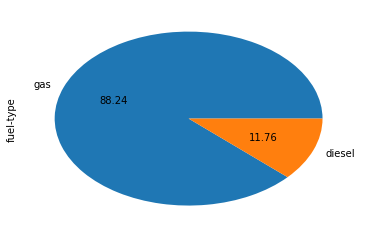

In [41]:
# Task 2: Data Exploration
# 1. Choose 1 column with nominal values, 1 column with ordinal Values, and 1 column with numerical values


#Creating a visualization for fuel-type which is a column with nominal values
import matplotlib.pyplot as plt
automobile['fuel-type'].value_counts().plot(kind='pie',autopct='%.2f')
plt.show()


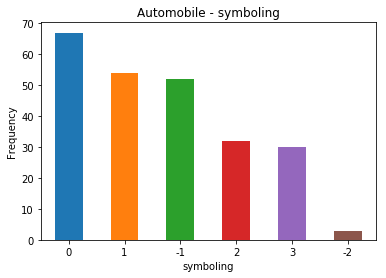

In [51]:
#Creating a visualization for symboling which is a column with ordinal values
automobile['symboling'].value_counts().plot(kind='bar',rot=0)
plt.title('Automobile - symboling')
plt.xlabel('symboling')
plt.ylabel('Frequency')
plt.show()

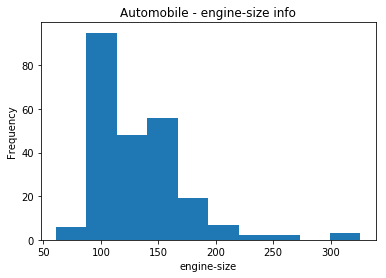

In [49]:
#Creating a visualization for engine-size which is a column with numerical values
automobile['engine-size'].plot(kind='hist',bins=10)
plt.title('Automobile - engine-size info')
plt.xlabel('engine-size')
plt.show()

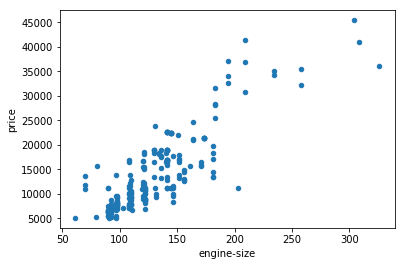

In [52]:
# Task 2: Data Exploration
# 2. Explore the relationships between columns; at least 3 visualisations with plausible hypothesis

#Code goes after this line
#Scatter plot between price and engine-size
automobile.plot(kind='scatter',x=15,y=24)
plt.show()


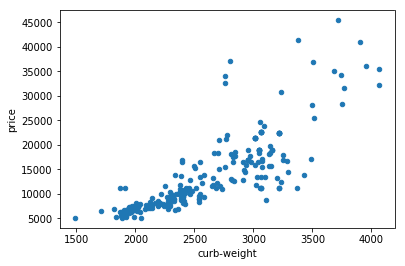

In [53]:
#Scatter plot between curb-weight and price
automobile.plot(kind='scatter',x=12,y=24)
plt.show()

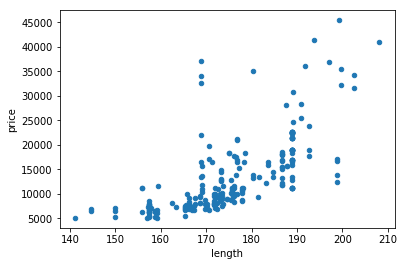

In [59]:
#Scatter plot between price and wheel-base
automobile.plot(kind='scatter',x=9,y=24)
plt.show()

C:\Users\lenovo\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


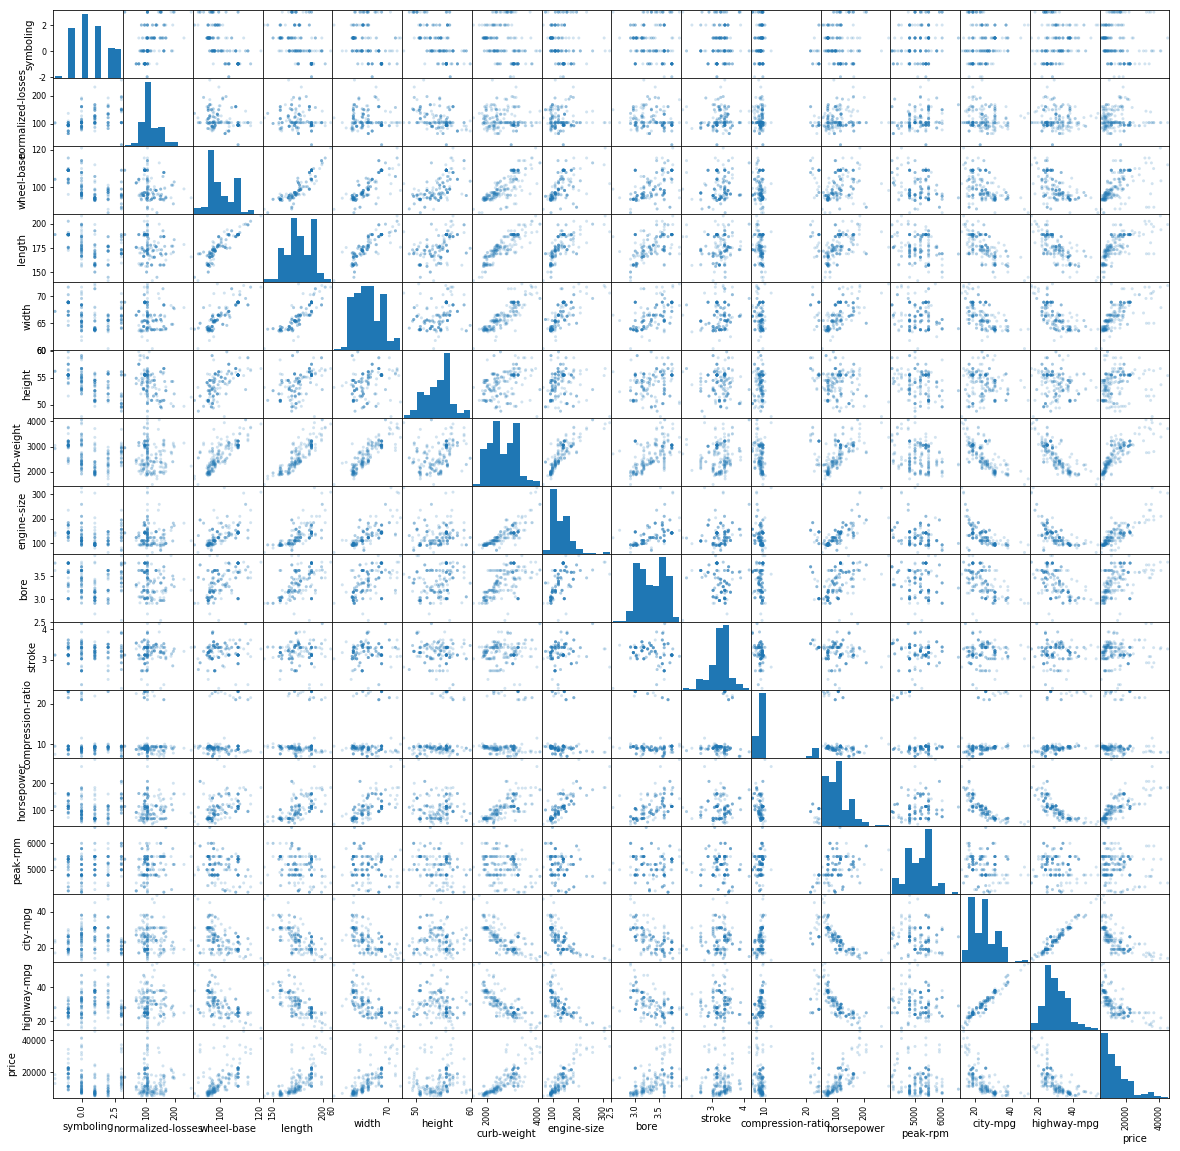

In [63]:
# Task 2: Data Exploration
# 3. Scatter matrix for all numerical columns

#Code goes after this line
from pandas.tools.plotting import scatter_matrix
scatter_matrix(automobile,alpha=0.2,figsize=(20,20),diagonal='hist')
plt.show()